# Bot Classification - OSRS

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import pandas as pd
import numpy as np
%matplotlib inline


In [28]:
import seaborn as sns
from scipy import stats

## Cleaning The Data

In [3]:
player_df = pd.read_csv('./data/player_data_04-2020.csv')
print('original shape: {}'.format(player_df.shape))
player_df = player_df.drop_duplicates(subset="Name")
print('shape after removing duplicates: {}'.format(player_df.shape))
player_df = player_df[player_df['Overall'] != -1]
print('shape after removing failed hiscores: {}'.format(player_df.shape))
player_df.head()

original shape: (2429, 41)
shape after removing duplicates: (2320, 41)
shape after removing failed hiscores: (2227, 41)


Name  helmet  cape  amulet  weapon  body  sheild  Equip7  legs  \
0       Aweb0kz      -1    -1      -1      -1    -1      -1      -1    -1   
1    Popeye2018      -1    -1    1660     853    -1      -1      -1  1099   
2  ImFatNotCute      -1    -1      -1      -1    -1      -1      -1    -1   
3     PappoSeco      -1    -1      -1      -1    -1      -1      -1    -1   
4     GB Justin      -1    -1      -1    1381    -1      -1      -1    -1   

   Equip9  ...  Mining  Herblore  Agility  Thieving  Slayer  Farming  \
0      -1  ...      60         1        1         1       1        1   
1      -1  ...      83         1       10         1       1        1   
2      -1  ...      41        30       25        20      63       17   
3      -1  ...      41         1        1         1       1        1   
4      -1  ...       1         1       37        19      33        1   

   Runecrafting  Hunter  Construction  Location  
0             1       1             1        ge  
1            30       1             1        ge  
2             9       1             1        ge  
3             1       1             1        ge  
4             1       1            27        ge  

[5 rows x 41 columns]

In [4]:
player_df['Location'].value_counts()

ge             773
lumbridge      467
attack         410
mining         351
woodcutting    146
fishing         80
Name: Location, dtype: int64

In [5]:
f2p_array = ['Attack', 'Defence', 'Strength','Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',\
           'Runecrafting', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining']

player_df.columns

Index(['Name', 'helmet', 'cape', 'amulet', 'weapon', 'body', 'sheild',
       'Equip7', 'legs', 'Equip9', 'gloves', 'boots', 'Equip12', 'Loc_x',
       'Loc_y', 'Anim_id', 'Overall', 'Attack', 'Defence', 'Strength',
       'Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',
       'Fletching', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining',
       'Herblore', 'Agility', 'Thieving', 'Slayer', 'Farming', 'Runecrafting',
       'Hunter', 'Construction', 'Location'],
      dtype='object')

## Exploring The Full Dataset (currently only skills)

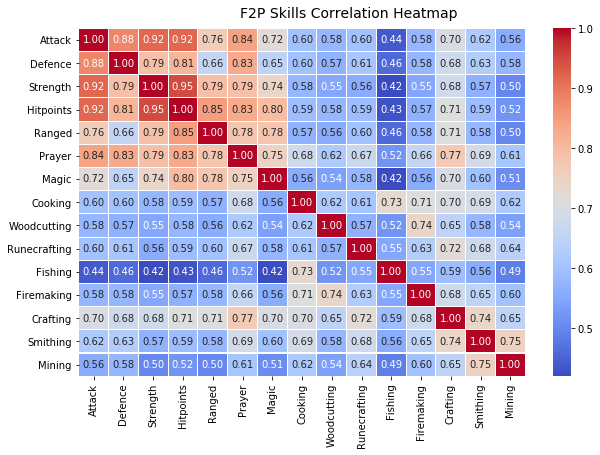

In [6]:
full_df = player_df[f2p_array]

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = full_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('F2P Skills Correlation Heatmap', fontsize=14)

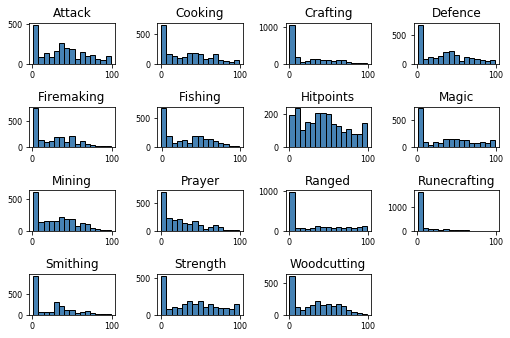

In [7]:
full_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

C:\Users\User\Anaconda3\envs\banbot\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


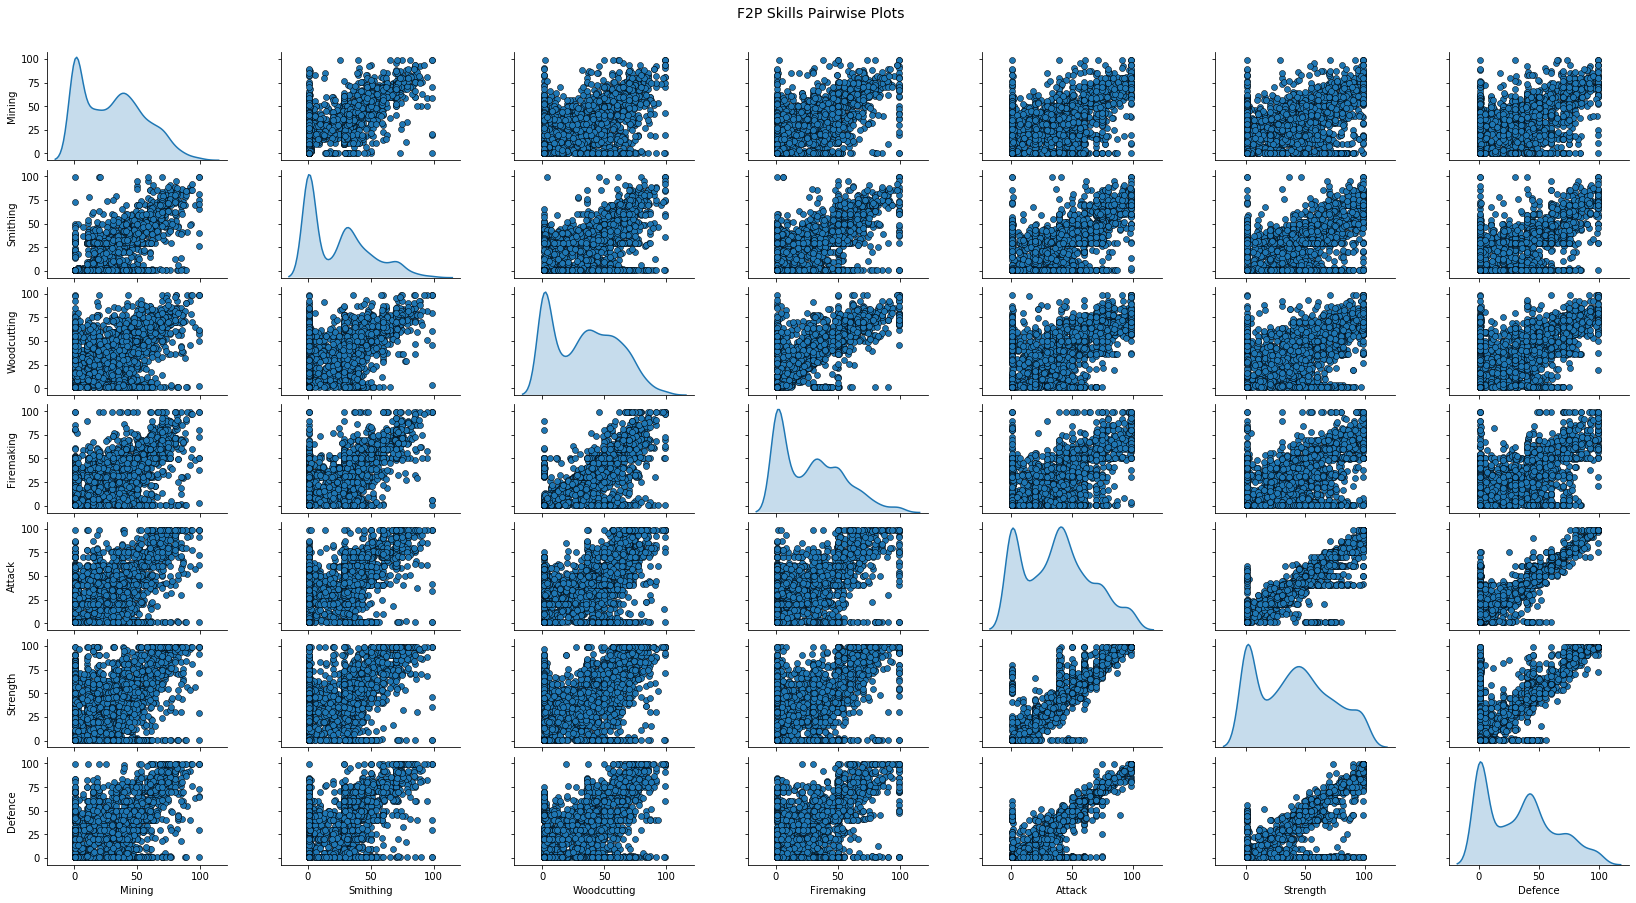

In [8]:
# Pair-wise Scatter Plots
cols = ['Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
pp = sns.pairplot(full_df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('F2P Skills Pairwise Plots', fontsize=14)

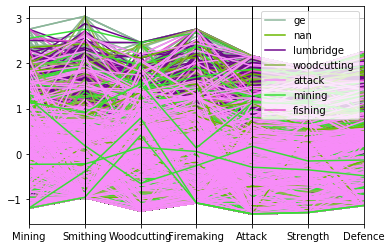

In [9]:
# Scaling attribute values to avoid few outliers
cols = ['Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
subset_df = full_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, player_df['Location']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Location')

Text(0, 0.5, 'Level')

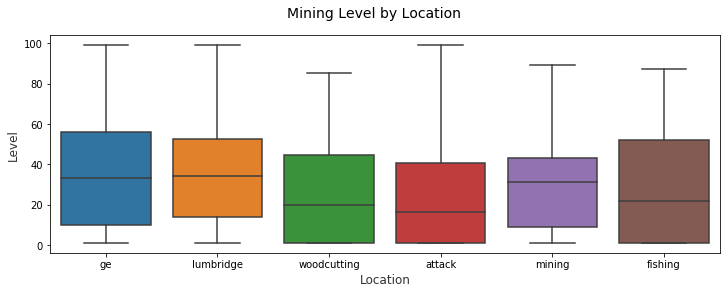

In [10]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Mining Level by Location', fontsize=14)

sns.boxplot(x="Location", y="Mining", data=player_df,  ax=ax)
ax.set_xlabel("Location",size = 12,alpha=0.8)
ax.set_ylabel("Level",size = 12,alpha=0.8)

## Exploring Skilling vs Chilling Areas

(1124, 41)


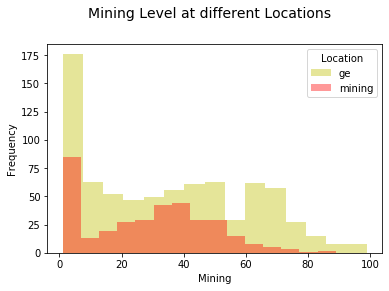

In [11]:
skill_areas = ["woodcutting", "attack", "mining", "fishing"]
chill_areas = ["ge", "lumbridge"]

split_df = player_df.loc[player_df['Location'].isin(['mining', 'ge'])]
split_df = split_df.reset_index(drop=True)
print(split_df.shape)

# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Mining Level at different Locations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Mining Level")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(split_df, hue='Location', palette={"mining": "r", "ge": "y"})
g.map(sns.distplot, 'Mining', kde=False, bins=15, ax=ax)
ax.legend(title='Location')
plt.close(2)

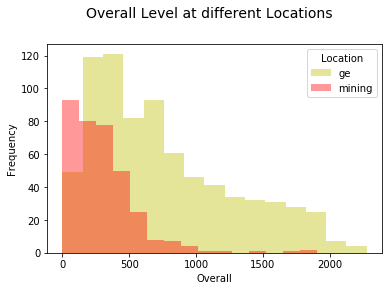

In [12]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Overall Level at different Locations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Overall Level")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(split_df, hue='Location', palette={"mining": "r", "ge": "y"})
g.map(sns.distplot, 'Overall', kde=False, bins=15, ax=ax)
ax.legend(title='Location')
plt.close(2)

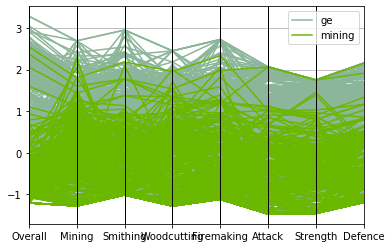

In [13]:
# Scaling attribute values to avoid few outliers
cols = ['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
subset_df = split_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, split_df['Location']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Location')

C:\Users\User\Anaconda3\envs\banbot\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


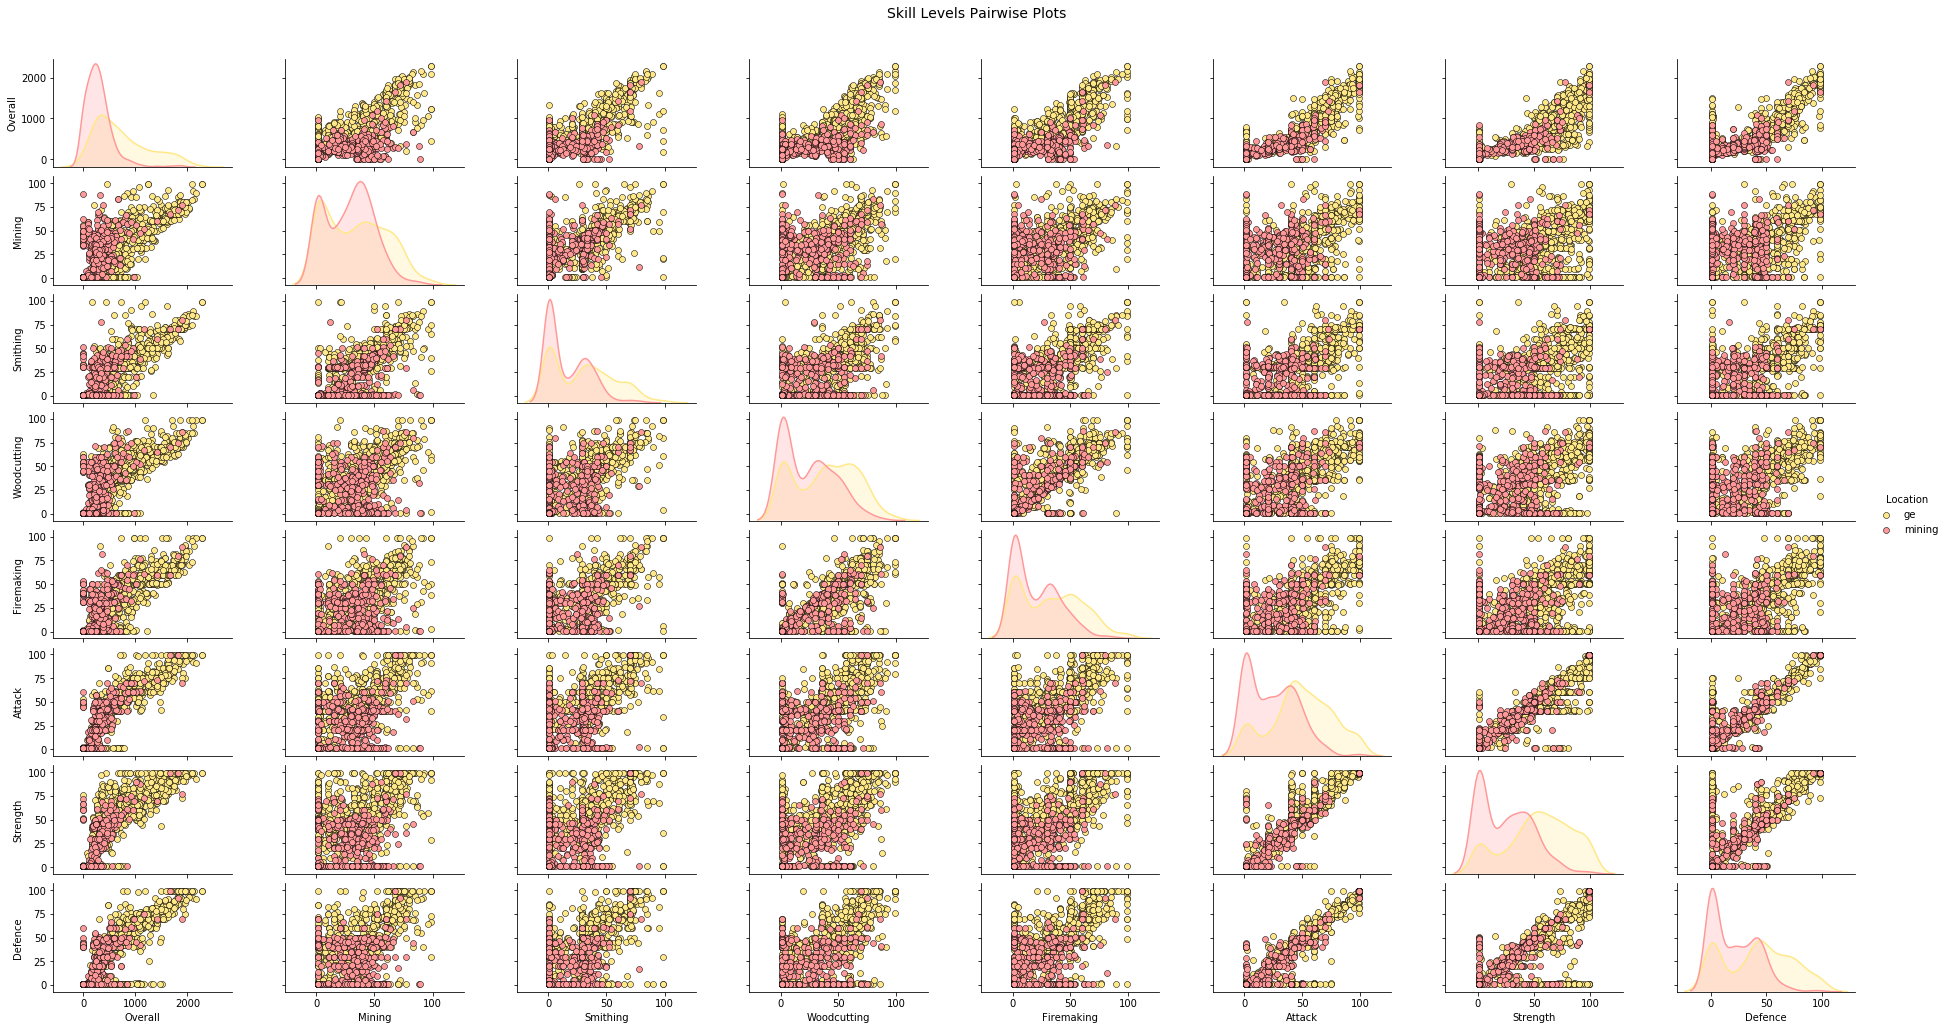

In [14]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence', 'Location']
subset_df = split_df[cols]
pp = sns.pairplot(subset_df, hue='Location', size=1.8, aspect=1.8, 
                  palette={"mining": "#FF9999", "ge": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Skill Levels Pairwise Plots', fontsize=14)

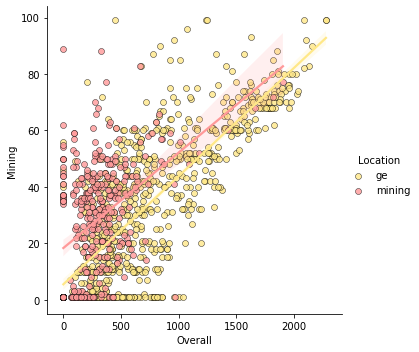

In [15]:
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='Overall', y='Mining', hue='Location', 
                palette={"mining": "#FF9999", "ge": "#FFE888"},
                data=subset_df, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))       

In [16]:
cols = ['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
subset_df = split_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, split_df['Location']], axis=1)
print(final_df.shape)

melted_skill_df = pd.melt(final_df, id_vars=['Location'], value_vars=['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence'])

(1124, 9)


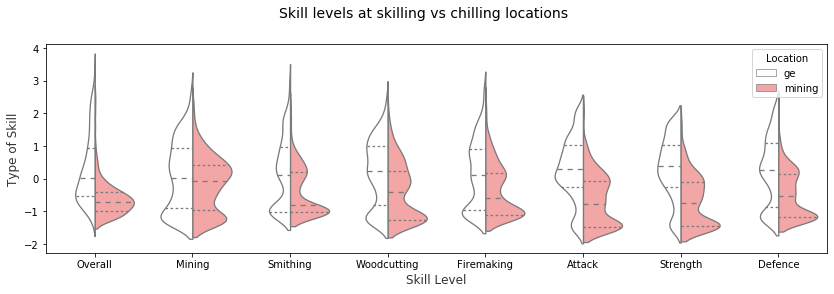

In [17]:
fig = plt.figure(figsize = (14, 4))
title = fig.suptitle("Skill levels at skilling vs chilling locations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax2 = fig.add_subplot(1,1, 1)
sns.violinplot(x='variable', y='value', hue='Location', 
               data=melted_skill_df, split=True, inner="quart", linewidth=1.3,
               palette={"mining": "#FF9999", "ge": "white"})
ax2.set_xlabel("Skill Level",size = 12,alpha=0.8)
ax2.set_ylabel("Type of Skill",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Location')

## Feature Engineering Time!

In [29]:
eng_df = player_df.copy()  # create copy of complete df to engineer features onto

Starting with simple but important features like number of items equipped and a skill ratio index

In [31]:
equip_list = ['helmet', 'cape', 'amulet', 'weapon', 'body', 'sheild','Equip7', 'legs', 'Equip9', 'gloves', 'boots', 'Equip12']
def count_equipment (row):
    total_equipment = 0
    for equip_name in equip_list:
        if (row[equip_name] != -1):
            total_equipment += 1
    return total_equipment

eng_df['equip_count'] = eng_df.apply (lambda row: count_equipment(row), axis=1)
eng_df.head()

Name  helmet  cape  amulet  weapon  body  sheild  Equip7  legs  \
0       Aweb0kz      -1    -1      -1      -1    -1      -1      -1    -1   
1    Popeye2018      -1    -1    1660     853    -1      -1      -1  1099   
2  ImFatNotCute      -1    -1      -1      -1    -1      -1      -1    -1   
3     PappoSeco      -1    -1      -1      -1    -1      -1      -1    -1   
4     GB Justin      -1    -1      -1    1381    -1      -1      -1    -1   

   Equip9  ...  Herblore  Agility  Thieving  Slayer  Farming  Runecrafting  \
0      -1  ...         1        1         1       1        1             1   
1      -1  ...         1       10         1       1        1            30   
2      -1  ...        30       25        20      63       17             9   
3      -1  ...         1        1         1       1        1             1   
4      -1  ...         1       37        19      33        1             1   

   Hunter  Construction  Location  equip_count  
0       1             1        ge            0  
1       1             1        ge            4  
2       1             1        ge            0  
3       1             1        ge            0  
4       1            27        ge            1  

[5 rows x 42 columns]

Text(0, 0.5, 'Number of Items Equipped')

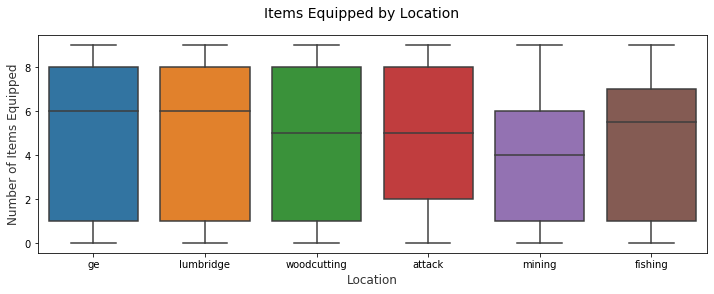

In [32]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Items Equipped by Location', fontsize=14)

sns.boxplot(x="Location", y="equip_count", data=eng_df,  ax=ax)
ax.set_xlabel("Location",size = 12,alpha=0.8)
ax.set_ylabel("Number of Items Equipped",size = 12,alpha=0.8)

In [51]:
f2p_array = ['Attack', 'Defence', 'Strength','Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',\
           'Runecrafting', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining']

def count_skills_above_10 (row):
    total_skills = 0
    for skill_name in f2p_array:
        if (row[skill_name] > 10):
            total_skills += 1
    return total_skills

eng_df['skills_above_10'] = eng_df.apply (lambda row: count_skills_above_10(row), axis=1)
eng_df.head()

Name  helmet  cape  amulet  weapon  body  sheild  Equip7  legs  \
0       Aweb0kz      -1    -1      -1      -1    -1      -1      -1    -1   
1    Popeye2018      -1    -1    1660     853    -1      -1      -1  1099   
2  ImFatNotCute      -1    -1      -1      -1    -1      -1      -1    -1   
3     PappoSeco      -1    -1      -1      -1    -1      -1      -1    -1   
4     GB Justin      -1    -1      -1    1381    -1      -1      -1    -1   

   Equip9  ...  Slayer  Farming  Runecrafting  Hunter  Construction  Location  \
0      -1  ...       1        1             1       1             1        ge   
1      -1  ...       1        1            30       1             1        ge   
2      -1  ...      63       17             9       1             1        ge   
3      -1  ...       1        1             1       1             1        ge   
4      -1  ...      33        1             1       1            27        ge   

   equip_count  skill_std  skill_mean  skills_above_10  
0            0  29.647934   34.000000                9  
1            4  30.375899   43.866667               11  
2            0  16.425010   47.066667               14  
3            0  19.382122   24.666667                9  
4            1  30.887970   23.933333                6  

[5 rows x 45 columns]

Text(0, 0.5, 'Number of Skills Above 10')

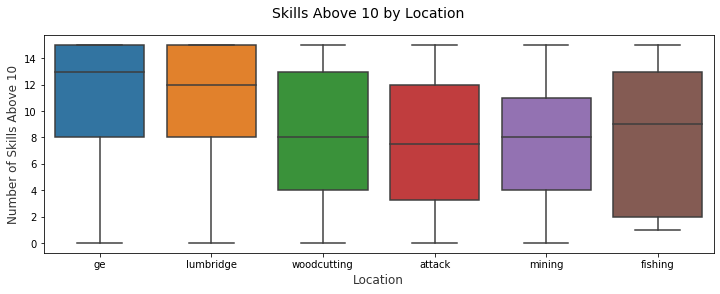

In [53]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Skills Above 10 by Location', fontsize=14)

sns.boxplot(x="Location", y="skills_above_10", data=eng_df,  ax=ax)
ax.set_xlabel("Location",size = 12,alpha=0.8)
ax.set_ylabel("Number of Skills Above 10",size = 12,alpha=0.8)

In [52]:
f2p_array = ['Attack', 'Defence', 'Strength','Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',\
           'Runecrafting', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining']
kept_features = ['Name', 'equip_count', 'Location', 'skills_above_10']
kept_features.extend(f2p_array)

eng_df_selected = eng_df.loc[:, kept_features]

eng_df_selected['skill_mean'] = eng_df_selected[f2p_array].mean(axis=1)
eng_df_selected['skill_std'] = eng_df_selected[f2p_array].std(axis=1)

print(eng_df_selected.shape)
eng_df_selected.head()

(2227, 21)


Name  equip_count Location  skills_above_10  Attack  Defence  \
0       Aweb0kz            0       ge                9      40       41   
1    Popeye2018            4       ge               11       1       40   
2  ImFatNotCute            0       ge               14      60       55   
3     PappoSeco            0       ge                9      40       40   
4     GB Justin            1       ge                6      70       62   

   Strength  Hitpoints  Ranged  Prayer  ...  Cooking  Woodcutting  \
0        44         42       1       2  ...       66           70   
1         1         54      64       1  ...       68           60   
2        57         68      74      42  ...       50           43   
3        40         36       1      31  ...        4           41   
4        75         69       1      43  ...        1            1   

   Runecrafting  Fishing  Firemaking  Crafting  Smithing  Mining  skill_mean  \
0             1       70          70         1         1      60   34.000000   
1            30       60          60        88        47      83   43.866667   
2             9       24          41        44        40      41   47.066667   
3             1        1           1         9        29      41   24.666667   
4             1        1           1        31         1       1   23.933333   

   skill_std  
0  29.647934  
1  30.375899  
2  16.425010  
3  19.382122  
4  30.887970  

[5 rows x 21 columns]

(1124, 20)


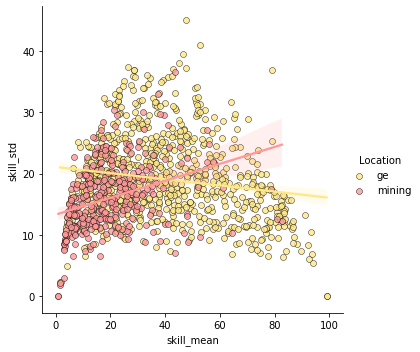

In [49]:
eng_split_df = eng_df_selected.loc[eng_df_selected['Location'].isin(['mining', 'ge'])]
eng_split_df = eng_split_df.reset_index(drop=True)
print(eng_split_df.shape)

# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='skill_mean', y='skill_std', hue='Location', 
                palette={"mining": "#FF9999", "ge": "#FFE888"},
                data=eng_split_df, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))       

# TESTING ZONE (BEWARE)

In [18]:
player_df['Magic'].round(decimals=-1).value_counts().sort_index(ascending=True)

0      698
10     113
20     111
30     133
40     264
50     192
60     231
70     117
80     160
90     114
100     94
Name: Magic, dtype: int64

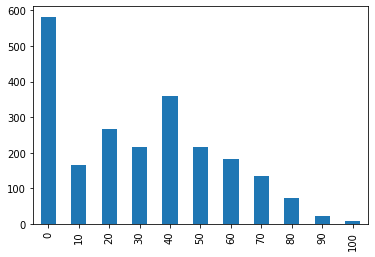

In [19]:
player_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

In [20]:
ge_df = player_df.loc[player_df['Location'] == 'ge']

print(ge_df.shape)
ge_df.head()

(773, 41)


Name  helmet  cape  amulet  weapon  body  sheild  Equip7  legs  \
0       Aweb0kz      -1    -1      -1      -1    -1      -1      -1    -1   
1    Popeye2018      -1    -1    1660     853    -1      -1      -1  1099   
2  ImFatNotCute      -1    -1      -1      -1    -1      -1      -1    -1   
3     PappoSeco      -1    -1      -1      -1    -1      -1      -1    -1   
4     GB Justin      -1    -1      -1    1381    -1      -1      -1    -1   

   Equip9  ...  Mining  Herblore  Agility  Thieving  Slayer  Farming  \
0      -1  ...      60         1        1         1       1        1   
1      -1  ...      83         1       10         1       1        1   
2      -1  ...      41        30       25        20      63       17   
3      -1  ...      41         1        1         1       1        1   
4      -1  ...       1         1       37        19      33        1   

   Runecrafting  Hunter  Construction  Location  
0             1       1             1        ge  
1            30       1             1        ge  
2             9       1             1        ge  
3             1       1             1        ge  
4             1       1            27        ge  

[5 rows x 41 columns]

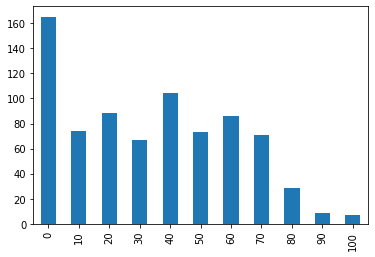

In [21]:
ge_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

In [22]:
mining_df = player_df.loc[player_df['Location'] == 'mining']

print(mining_df.shape)
mining_df.head()

(351, 41)


Name  helmet   cape  amulet  weapon  body  sheild  Equip7   legs  \
1435    Brad sux    1042   1021    1718    1273    -1      -1      -1   1011   
1436    deme1994    1137   1019    1009    1265  1119    1189      -1   1067   
1437    Prisco50      -1     -1      -1    1275    -1      -1      -1     -1   
1438    TGIF2k20    1159  13679    1478    1329  1121    1197      -1   1071   
1439  Webkinz138    1159   1007      -1    1265  1121    1197      -1  12289   

      Equip9  ...  Mining  Herblore  Agility  Thieving  Slayer  Farming  \
1435      -1  ...      21         4       30        16      35        1   
1436      -1  ...      24         1        1         1       1        1   
1437      -1  ...      61         1        1         1       1        1   
1438      -1  ...      44         1        1         1       1        1   
1439      -1  ...       1         1        1         1       1        1   

      Runecrafting  Hunter  Construction  Location  
1435             1       1             1    mining  
1436             2       1             1    mining  
1437             1       1             1    mining  
1438            15       1             1    mining  
1439             8       1             1    mining  

[5 rows x 41 columns]

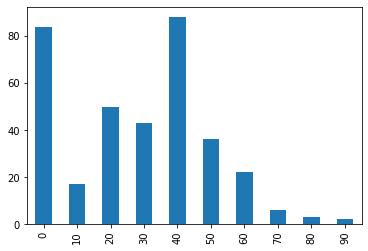

In [23]:
mining_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

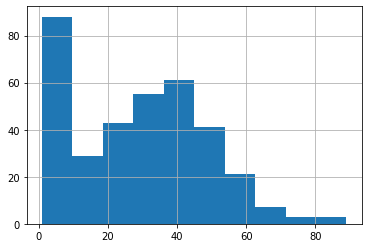

In [24]:
mining_df['Mining'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED3D067388>,
      dtype=object)

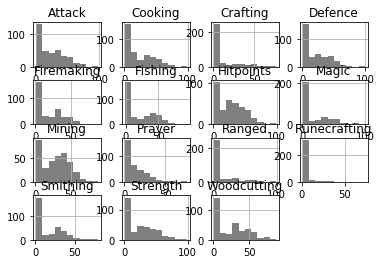

In [25]:
mining_df[f2p_array].hist(color='k', alpha=0.5, bins=10)

In [26]:
for skill in f2p_array:
    print("{}: {}".format(skill, mining_df[skill].value_counts()[1]))

Attack: 107
Defence: 130
Strength: 121
Hitpoints: 44
Ranged: 228
Prayer: 138
Magic: 171
Cooking: 97
Woodcutting: 96
Runecrafting: 288
Fishing: 116
Firemaking: 108
Crafting: 176
Smithing: 159
Mining: 72


In [1]:
# Initialize plotting library and functions for 3D scatter plots 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

C:\Users\User\Anaconda3\envs\banbot\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [3]:
# Create an artificial dataset with 3 clusters for 3 feature columns
X, Y = make_classification(n_samples=100, n_classes=3, n_features=3, n_redundant=0, n_informative=3,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y
df.head(3)

x0           x1           x2  y
0  -534.721071   296.612751  1066.925601  2
1 -2366.263858 -2610.129149   936.787163  0
2   723.328878  -909.497299  -951.750002  1

In [11]:
# Visualize cluster shapes in 3d.

cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]

cluster1.values[:, 0]

array([-2366.2638584 ,  -429.17233222,  -765.75168653, -1087.33050621,
       -2039.55768016, -1913.15063424, -1813.32578518,   615.24375335,
        -511.09511191, -1539.22742336,  -427.786768  , -1214.55243729,
        -446.15384116,  -559.15434287,  -398.41328579, -1439.9945903 ,
       -1324.03857731, -1520.10112853,  -419.03614397,  -698.40965346,
       -1063.16166744, -1079.57837699, -1761.11702382,   452.91620812,
       -1941.54636864,  -265.73334186, -1146.03880035,  -995.85354535,
        -770.19393403,  -996.43212253, -1664.91704805,  -597.43777175,
        -774.92653749, -1270.45127076])

In [13]:

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')